In [174]:
import pandas as pd
import numpy as np
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.3


In [175]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='replace')

In [176]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [177]:
df.shape

(5572, 5)

In [178]:
#1 DATA CLEANING
#2 EDA(EXPLORATORY DATA ANALYSIS)
#3 TEXT PREPROCESSING
#4 MODEL BIULDING
#5 MODEL EVALUATION
#6 IMPROVEMENTS
#7 Website building
#8 dEPLOYING

# 1.DATA CLEANINIG #

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [180]:
#drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [181]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
#renaming the col.

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [183]:
df.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
#using label encoder to replace "ham" & "spam" with numerical values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [185]:
df['Target']=encoder.fit_transform(df['Target'])

In [186]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [187]:
# missing values 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [188]:
# check for duplicate values

df.duplicated().sum()

403

In [189]:
#drop the duplicated values

df=df.drop_duplicates(keep='first')

In [190]:
df.duplicated().sum()

0

In [191]:
df.shape

(5169, 2)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [193]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
df.shape

(5169, 2)

# 2.EDA #

In [195]:
#1 Checking the % of spam and ham


df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

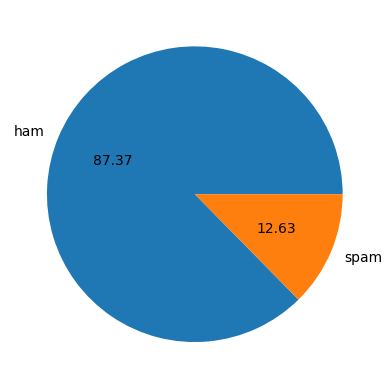

In [196]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

the Ham are more then spam but still data is imbalanced

downlaod Natural language tool kit for adv. analysis

In [197]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
import nltk

In [199]:
nltk.download('punkt')
print(nltk.data.path)
nltk.data.path.append('\\Users\\PINKY\\anaconda3\\lib\\nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PINKY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['C:\\Users\\PINKY/nltk_data', 'c:\\Users\\PINKY\\anaconda3\\nltk_data', 'c:\\Users\\PINKY\\anaconda3\\share\\nltk_data', 'c:\\Users\\PINKY\\anaconda3\\lib\\nltk_data', 'C:\\Users\\PINKY\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', '\\Users\\PINKY\\anaconda3\\lib\\nltk_data']


In [200]:
#2 counting the number of characters 

df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [201]:
df['num_char']=df['Text'].apply(len)

In [202]:
df['num_char']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: num_char, Length: 5169, dtype: int64

In [203]:
# num of words
# Count number of words using simple split
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))

In [204]:
df.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [205]:
#number of sentences

df['num_sentences'] = df['Text'].apply(
    lambda x: len([sentence for sentence in x.split('.') + x.split('!') + x.split('?') if sentence.strip()])
)

In [206]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5
1,0,Ok lar... Joking wif u oni...,29,6,4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4
3,0,U dun say so early hor... U c already then say...,49,11,4
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3


In [207]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,15.340685,4.315341
std,58.174846,11.068488,1.656794
min,2.000000,1.000000,3.000000
25%,36.000000,7.000000,3.000000
50%,60.000000,12.000000,4.000000
75%,117.000000,22.000000,5.000000
max,910.000000,171.000000,33.000000


In [208]:
df[df['Target']==0][['num_char','num_words','num_sentences']].describe()        #for ham 

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,14.134632,4.111382
std,56.356802,11.116240,1.531433
min,2.000000,1.000000,3.000000
25%,34.000000,7.000000,3.000000
50%,52.000000,11.000000,4.000000
75%,90.000000,18.000000,5.000000
max,910.000000,171.000000,33.000000


In [209]:
df[df['Target']==1][['num_char','num_words','num_sentences']].describe()        #for spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,23.681470,5.725881
std,30.014336,5.967672,1.798914
min,13.000000,2.000000,3.000000
25%,131.000000,22.000000,4.000000
50%,148.000000,25.000000,6.000000
75%,157.000000,28.000000,7.000000
max,223.000000,35.000000,12.000000


<Axes: xlabel='num_char', ylabel='Count'>

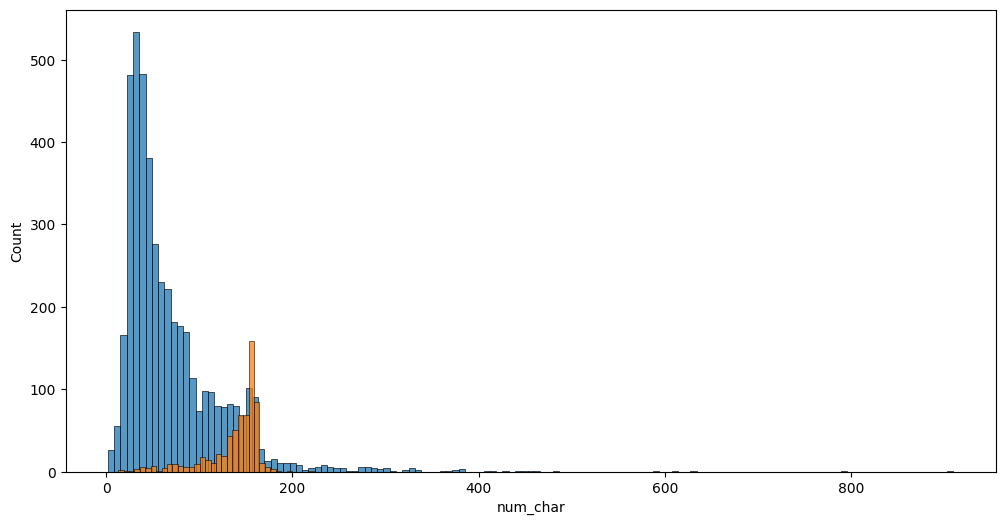

In [210]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_char'])   #ham
sns.histplot(df[df['Target']==1]['num_char'])   #spam


<Axes: xlabel='num_words', ylabel='Count'>

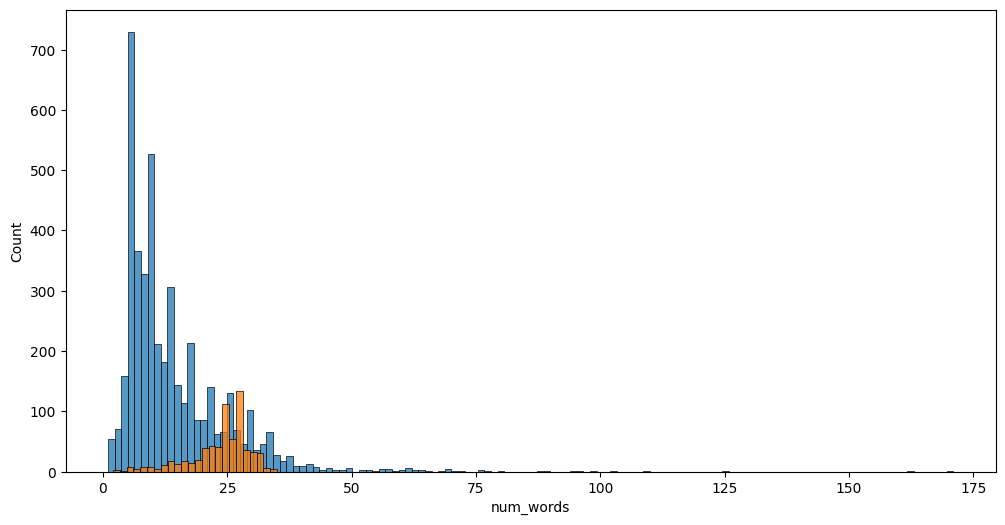

In [211]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])   #ham
sns.histplot(df[df['Target']==1]['num_words'])   #spam

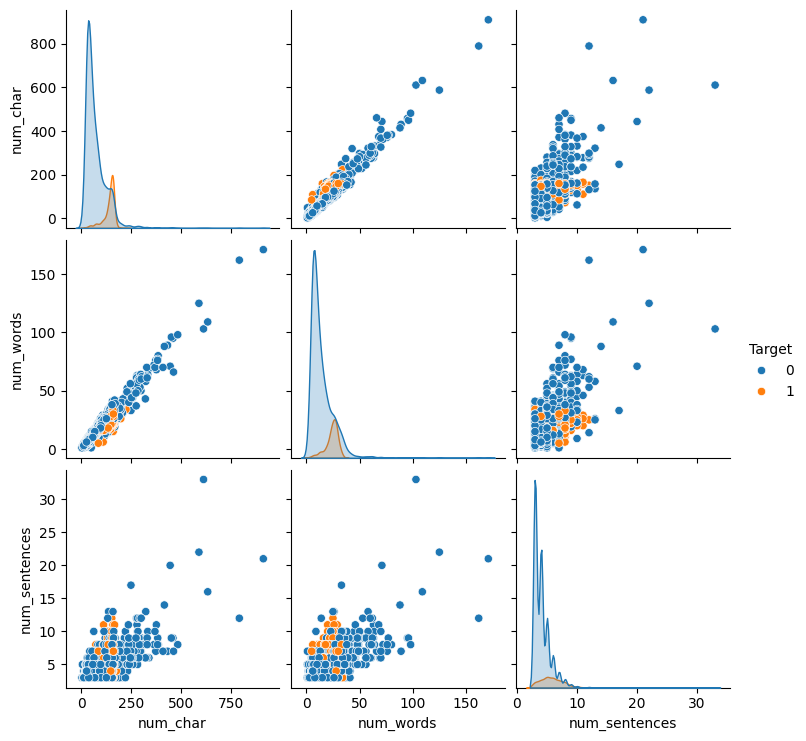

In [212]:
sns.pairplot(df,hue='Target')

## outliers are present in data

now , correlation coefficient 

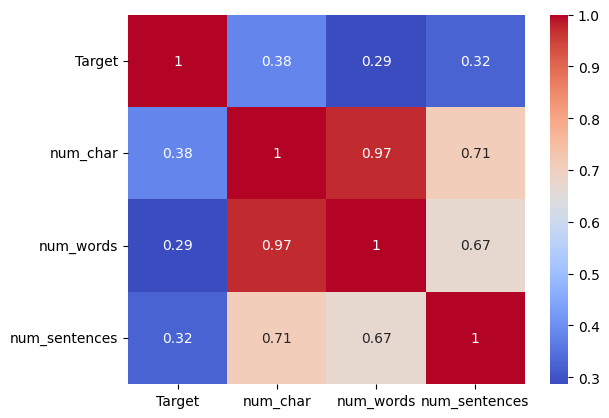

In [213]:
numeric_df = df[['Target','num_char', 'num_words', 'num_sentences',]]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Observation:- According to heatmap ( corr coef.) the corr of num_words & num_sentences are higher which creates outliers...so we will traon model on the basis of num_char column

# 3 Data preprocessing

In [214]:
#1 Lower case
#2 Tokenization
#3 Removing special characters
#4 Removing stop words punctuation
#5 Stemming

In [215]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # Optional, useful for text processing
nltk.download('wordnet')    # Optional, for lemmatization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PINKY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PINKY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PINKY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [216]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [217]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [218]:
from nltk.stem.porter import PorterStemmer      #stemming
ps=PorterStemmer()
ps.stem('loving')

'love'

In [219]:
#function
def transform_text(text):
    text=text.lower()                   #for converting upper to lower case values
    text= nltk.word_tokenize(text)      #for tokenizing the sentences into each words

    y=[]                                #for removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text=y[:]                          #for eliminating stopwords
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [220]:
transform_text('SURAJ , HOW ARE YOU DOING?, LETS MEET TODAY!!')

'suraj let meet today'

Since "suraj","today" are not stop words....rest were stop words as shown thus get removed from the sentence

all the punctuations are removed

the sentence has been tokeinzed

the sentenc got stemmed and broke the words to their root form

let us apply on the 1st tupple of the dataset

In [221]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [222]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [223]:
df['transformed_text']=df['Text'].apply(transform_text)

In [224]:
df.head()

,Target,Text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,4,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,4,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3,nah think goe usf live around though


#  WORD CLOUD FOR SPAM & HAM 

In [225]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [226]:
from wordcloud import WordCloud

In [227]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [228]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

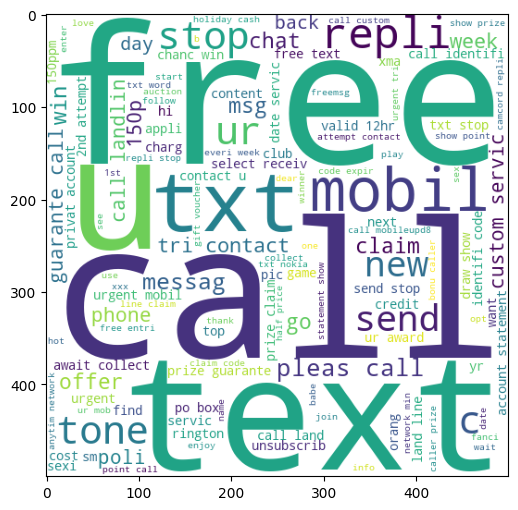

In [229]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [230]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

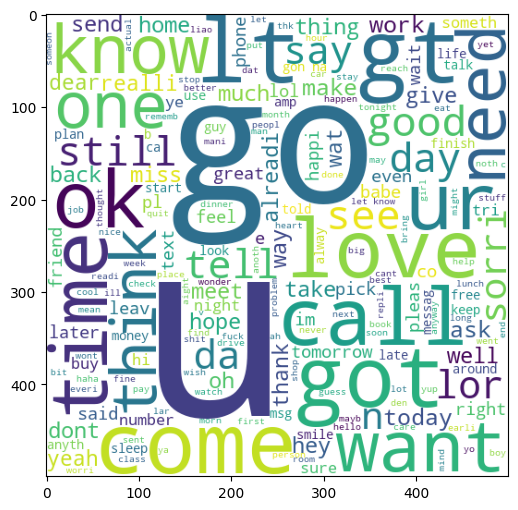

In [231]:
plt.figure(figsize=(14,6))
plt.imshow(ham_wc)

# top 30 words used in spam & ham

In [232]:
df.head()

,Target,Text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,4,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,4,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3,nah think goe usf live around though


In [233]:
# for spam ( we will retrive all the spam messages and then in that we will split all the sentences in words and then will we use counter function from collection library)


spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [234]:
len(spam_corpus)

9941

In [235]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


so, here we got the mtop 30 most repeated spam words 

lets plot a barplot for this

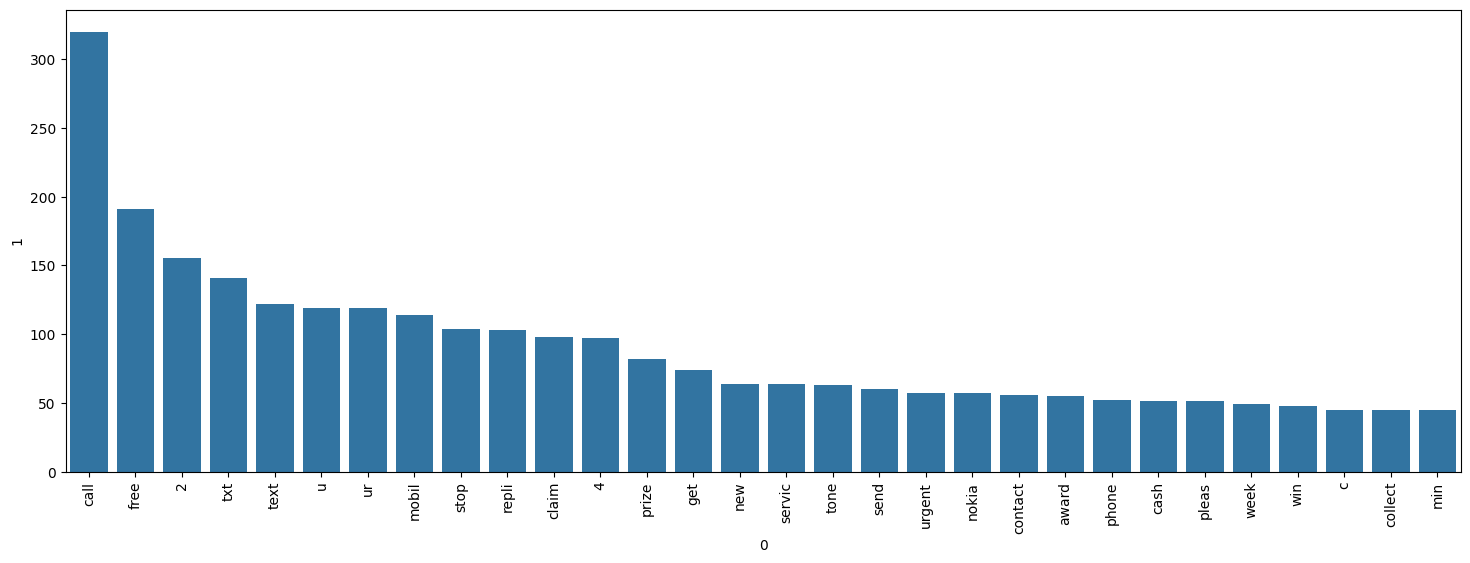

In [236]:
plt.figure(figsize=(18,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


similarly we will be doing same for ham messages 

In [237]:
#for ham ( we will retrive all the ham messages and then in that we will split all the sentences in words and then will we use counter function from collection library)


ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [238]:
len(ham_corpus)

35305

In [239]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


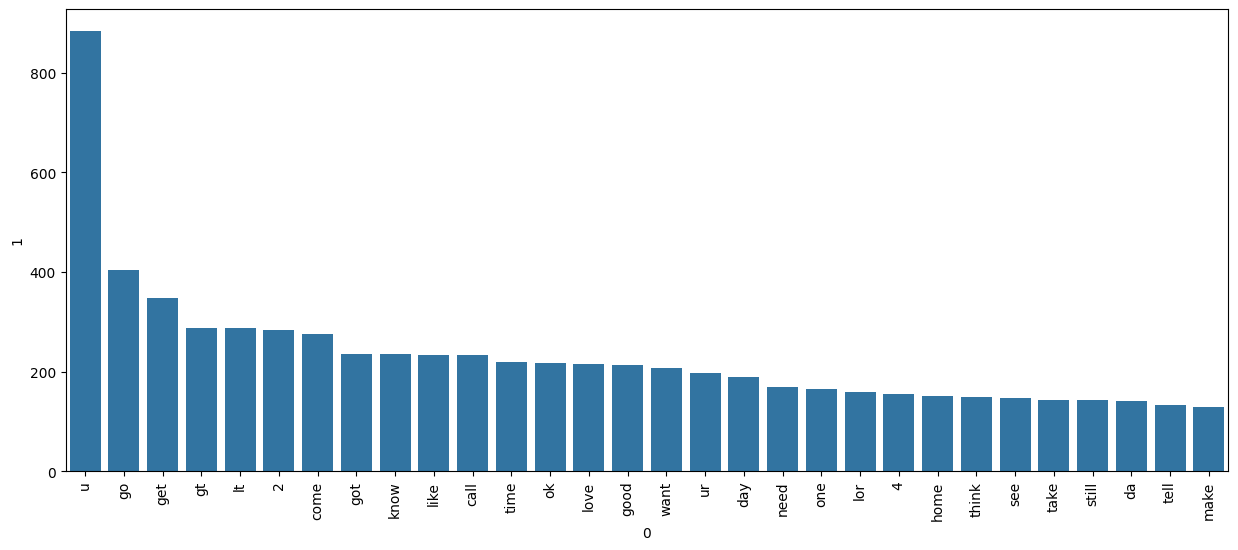

In [240]:
plt.figure(figsize=(15,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


# MODEL BUILDING AND TRAINING

In [241]:
df.head()

,Target,Text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,5,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,4,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,4,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,3,nah think goe usf live around though


In [242]:
#1st we use Naive bayes classification

for naive bayes we need input as a vector / numerical values .....here our input colum is "transformed_text" which is not a vector....and output or label column is "Target" which is numerical.

# 1 Text Vectorization
# 2 using Bag of words

In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [316]:
X=tfidf.fit_transform((df['transformed_text'])).toarray()

In [317]:
X.shape

(5169, 3000)

5169 sms...6677 words

In [318]:
#now , y

y=df['Target'].values

In [319]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [320]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [321]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [322]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [323]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [324]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [325]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [326]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


on comparing all of the 3 models ....the precision score of mnb(multinomialNB) is greater than aother two....since it reduces the false positive values.

NOW LETS COMPARE MNCB WITH ALL OTHER POSSIBLE ML MODELS

In [299]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [301]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
lrc=LogisticRegression(solver='liblinear', penalty='l1')

In [302]:
clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [303]:
#training the classifier by creating a function where each model get trained

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [304]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9729206963249516, 0.9741379310344828)

In [305]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9908256880733946
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.971953578336557
Precision -  0.957983193277311


In [306]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [307]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.976789,0.991379
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
10,xgb,0.971954,0.957983
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538
6,AdaBoost,0.924565,0.840909


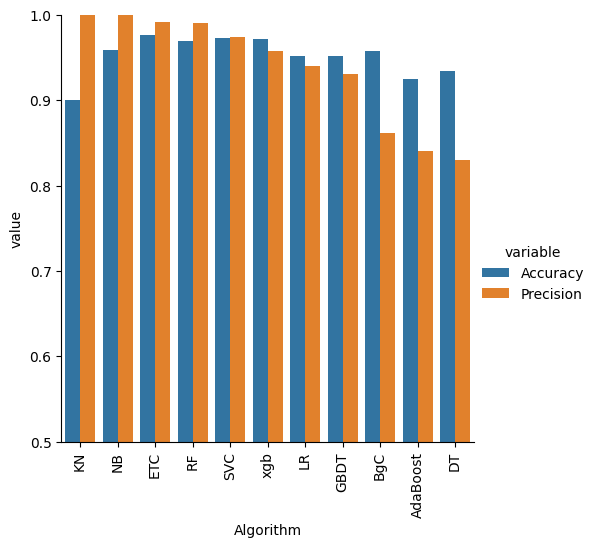

In [308]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# NOW ON COMAPRING ACCURACY AND PRECISON SCORE OF EACH AND EVERY MODEL...THE PERFECT FITS ARE ETC , RF AND NB...WE WILL GO WIT H NAIVE BAYES (NB)

In [309]:
#model improve
#1. change the max_features parameter of TFIDF

In [310]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [311]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.976789,0.991379
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
10,xgb,0.971954,0.957983
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538
6,AdaBoost,0.924565,0.840909


In [312]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379
3,RF,0.970019,0.990826,0.970019,0.990826
4,SVC,0.972921,0.974138,0.972921,0.974138
5,xgb,0.971954,0.957983,0.971954,0.957983
6,LR,0.951644,0.940000,0.951644,0.940000
7,GBDT,0.951644,0.931373,0.951644,0.931373
8,BgC,0.957447,0.861538,0.957447,0.861538
9,AdaBoost,0.924565,0.840909,0.924565,0.840909


# MULTINOMIAL NB CLASSIFIER IS THE BEST PERFORMING MODEL COMPARED TO ALL OTHER...

In [334]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [339]:
with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

input_text = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Ensure you use the correct transformation
vector_input = tfidf.transform(input_text)

# Predict
result = model.predict(vector_input)[0]
print("Spam" if result == 1 else "Not Spam")


Not Spam


In [338]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."